<a href="https://colab.research.google.com/github/Rmejiaz/AnaliticadeDatos/blob/master/Deserci%C3%B3nUTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analítica de Datos - Análisis base de datos de deserción de estudiantes de la UTP

### Rafael Mejía Zuluaga
### rmejiaz@unal.edu.co

En este cuaderno se pretende hacer un análisis de un dataset con información de estudiantes de la Universidad Tecnológica de Pereira, con el fin de encontrar patrones o estructuras en los datos que permitan predecir si un estudiante va a desertar o no. Para esto, primero se realiza un análisis exporatorio y se presentan la estadística descriptiva básica. Luego, abordamos el problema de clasificación haciendo uso de algunos algritmos de clasificación clásicos, y por último se prueba una red neuronal profunda.

## Descarga del dataset

In [ ]:
# Para descargar el dataset
FILEID = "1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip

# Decargar un .py con funciones 
FILEID2 = "1sf94WDnN6cNsm9OvOfU49h1Dd6o1ZJtY"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID2 -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID2 -O funciones_desercion.py && rm -rf /tmp/cookies.txt


--2020-07-14 14:31:13--  https://docs.google.com/uc?export=download&confirm=&id=1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE
Resolving docs.google.com (docs.google.com)... 64.233.188.102, 64.233.188.101, 64.233.188.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-c0-docs.googleusercontent.com/docs/securesc/7qu4djj855idml0dcldd9mnslabnvlr5/12c24acn6mfe6h9qhcsg6tvageo0313b/1594737075000/09173029842254050324/14579183722509240508Z/1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE?e=download [following]
--2020-07-14 14:31:15--  https://doc-0o-c0-docs.googleusercontent.com/docs/securesc/7qu4djj855idml0dcldd9mnslabnvlr5/12c24acn6mfe6h9qhcsg6tvageo0313b/1594737075000/09173029842254050324/14579183722509240508Z/1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE?e=download
Resolving doc-0o-c0-docs.googleusercontent.com (doc-0o-c0-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to 

In [ ]:
# Separamos X y y de train y test

import pandas as pd
import matplotlib.pyplot as plt

Train = pd.read_excel('DesercionUTP/Train.xlsx')
Test = pd.read_excel('DesercionUTP/Test.xlsx')
ytrain, ytest = Train['Etiqueta'], Test['Etiqueta']
Xtrain, Xtest = Train.drop(columns='Etiqueta'), Test.drop(columns='Etiqueta')
Xtrain.head()
Train.head()

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2018-2,18,0,2,0,237.00,486401.00,-2.4,3.1,-3.2,-4.9,50,39,0,2,0,0,5,0,0,3,0,6,0,1,0,0,1
1,2018-1,19,0,2,0,315.00,654797.61,-3.3,1.4,-4.3,-0.2,79,58,2,6,0,0,0,0,3,5,0,0,1,0,0,0,1
2,2018-2,20,1,3,0,244.00,1944582.00,0.0,0.0,0.0,0.0,33,28,2,10,2,11,0,0,0,2,0,3,0,0,1,0,0
3,2019-1,24,1,1,0,43.25,271560.00,3.1,2.7,2.5,-2.0,36,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,2018-1,23,1,2,0,261.00,415039.58,-1.0,1.1,-2.6,-8.6,26,28,4,3,3,0,0,2,4,10,0,3,0,0,0,1,1


# Análisis Exploratorio

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Periodo                                     4600 non-null   object 
 1   EDAD                                        4600 non-null   int64  
 2   SEXO                                        4600 non-null   int64  
 3   ESTRATO                                     4600 non-null   int64  
 4   NATURALEZA DE COLEGIO                       4600 non-null   int64  
 5   PUNTAJE INSCRIPCIÓN ICFES (No matriculado)  4600 non-null   float64
 6   VALOR PAGADO                                4600 non-null   float64
 7   CALIF_ACADEMICA                             4600 non-null   float64
 8   CALIF_ECONOMICO                             4600 non-null   float64
 9   CALIF_FAMILIAR                              4600 non-null   float64
 10  CALIF_PSICOS

## Estadística descriptiva

In [ ]:
Train.describe()

,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000
mean,19.933261,0.574783,1.988696,0.128043,292.913667,7.950010e+05,-0.485957,0.903891,-2.730957,-2.668304,42.776522,34.973261,2.31500,5.967826,2.508913,1.517391,0.976739,0.953913,1.883043,1.450217,0.456522,1.169348,0.116087,0.207609,0.491304,0.18500,0.751739
std,3.092490,0.494430,0.879004,0.334175,48.550903,9.479895e+05,2.008979,1.787336,2.608343,3.036601,13.749382,7.081634,3.55886,4.972358,3.739089,3.282410,2.147553,1.964472,3.544427,2.515211,1.442626,2.396411,0.320364,0.405639,0.499979,0.38834,0.432051
min,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,-7.000000,-4.900000,-8.900000,-11.800000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,18.000000,0.000000,1.000000,0.000000,266.362500,2.715600e+05,-1.900000,-0.200000,-4.600000,-4.800000,38.000000,30.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,19.000000,1.000000,2.000000,0.000000,296.000000,4.519254e+05,-0.500000,1.100000,-3.200000,-2.800000,43.000000,34.000000,0.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,21.000000,1.000000,2.000000,0.000000,323.000000,7.274438e+05,0.900000,2.200000,-1.100000,-0.700000,50.000000,39.000000,3.00000,8.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.00000,1.000000
max,60.000000,1.000000,6.000000,1.000000,448.000000,8.642568e+06,6.400000,5.500000,8.400000,9.000000,83.000000,71.000000,36.00000,36.000000,30.000000,32.000000,26.000000,17.000000,33.000000,20.000000,11.000000,18.000000,1.000000,1.000000,1.000000,1.00000,1.000000


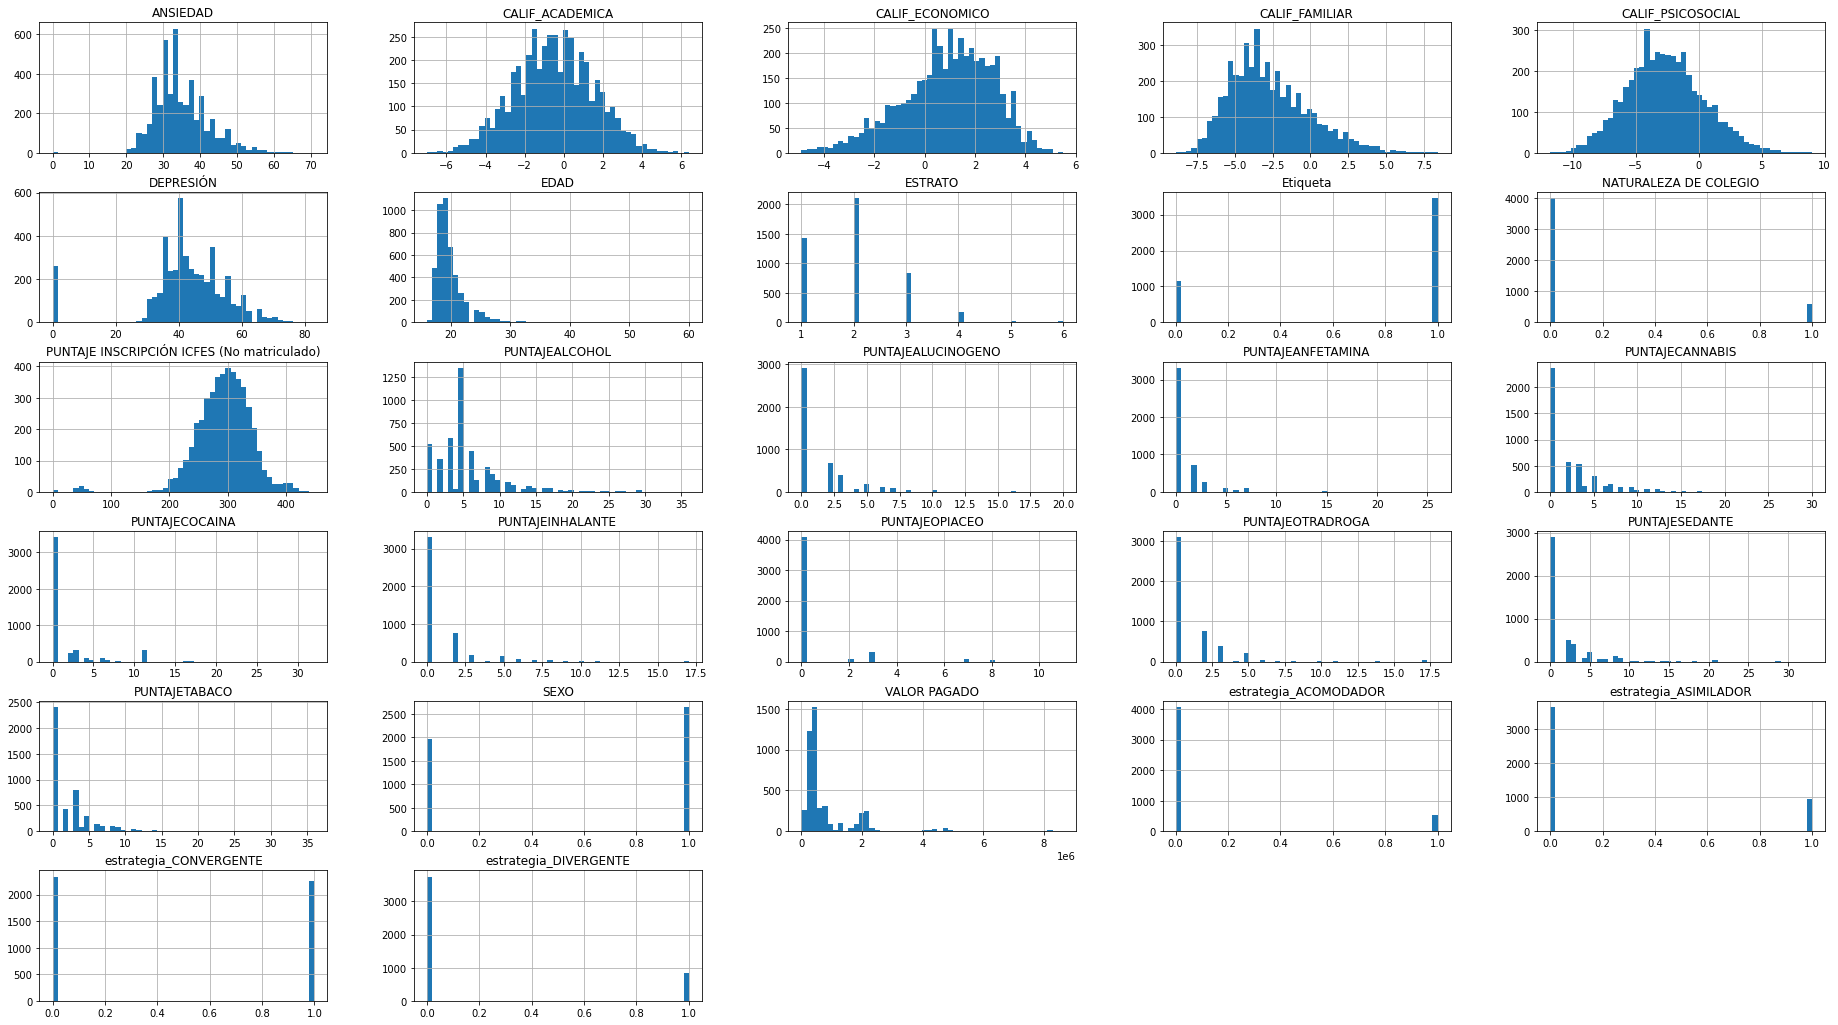

In [ ]:
%matplotlib inline
Train.hist(bins=50, figsize=(32,18))
plt.show()

## Etiqueta:

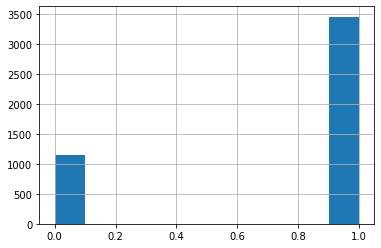

1    75.173913
0    24.826087
Name: Etiqueta, dtype: float64

In [ ]:
Train['Etiqueta'].hist()
plt.show()

Train['Etiqueta'].value_counts(normalize=True)*100

Como podemos ver, hay un desbalance considerable en los datos, pues el **75%** de ellos tienen la etiqueta 1. Esto merece atención, pues en caso de tener un clasificador simple que clasifique todo con la etiqueta 1, alcanzaríamos una exactitud del 75%, lo cual claramente no refleja un buen desempeño en este caso. Por este motivo, es importante utilizar otras métricas como lo son *Precision, Recall* y *F1 Score* 

## Atributos psicológicos

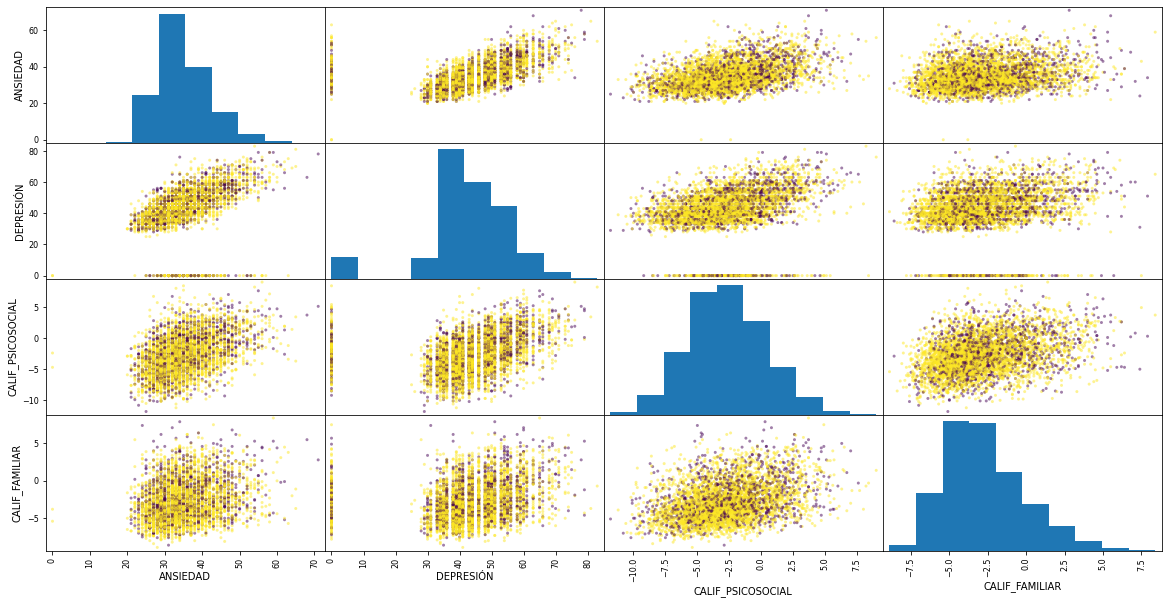

In [ ]:
from pandas.plotting import scatter_matrix


attributes = ['ANSIEDAD','DEPRESIÓN','CALIF_PSICOSOCIAL','CALIF_FAMILIAR']

scatter_matrix(Train[attributes], figsize=(20, 10),c=Train['Etiqueta'])
plt.show()

Los puntos amarillos corresponden a instancias en los cuales la etiqueta es 1, mientras que los morados corresponden a 0.

Es interesante ver la dependencia lineal entre atributos tales como Ansiedad y Depresión, o Calificación Psicosocial con Depresión, Ansiedad y Calificación Familiar. Sin embargo, no parece haber ningún patrón resaltable en cuanto a la etiqueta.



## Atributos de desmpeño académico y edad



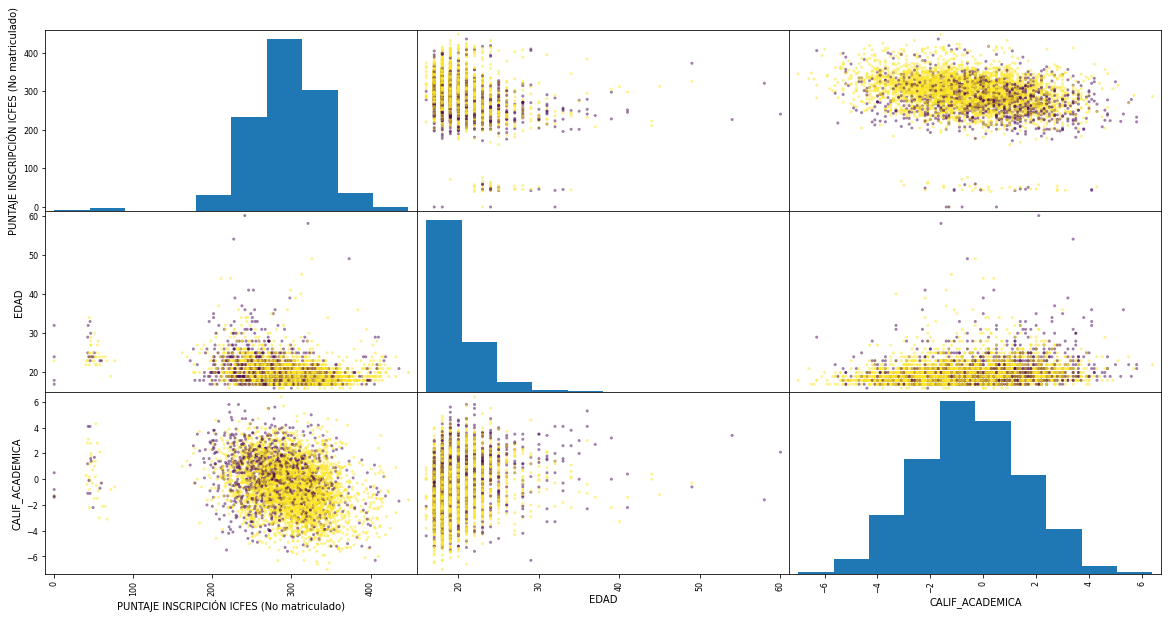

In [ ]:
attributes = ['PUNTAJE INSCRIPCIÓN ICFES (No matriculado)', 'EDAD', 'CALIF_ACADEMICA']

scatter_matrix(Train[attributes],figsize=(20,10),c=Train['Etiqueta'])
plt.show()

No hay dependencias lineales claras, sin embargo, vale la pena mirar a detalle el scatter entre puntaje de ICFES y Calificación Académica

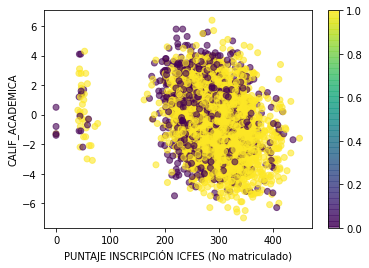

In [ ]:
plt.scatter(x=Train['PUNTAJE INSCRIPCIÓN ICFES (No matriculado)'],y=Train['CALIF_ACADEMICA'],c=ytrain,alpha=0.6)
plt.colorbar()
plt.xlabel("PUNTAJE INSCRIPCIÓN ICFES (No matriculado)")
plt.ylabel("CALIF_ACADEMICA")
plt.show()

No es clara la tendencia, pero parece haber una concentración un poco mayor de instancias etiquetadas con 1 en comparación con instancias etiquetadas en 0 en los puntajes de ICFES altos y calificaciones académicas bajas (parte inferior derecha). Lo cual puede dar a entender que un estudiante que tiene calificaciones académicas bajas tiene mayor probabilidad de desertar si su puntaje de ICFES fue alto 

## Preproceso con Pipeline 
Codificación del atributo 'periodo' y escalado de las características. Se realizan pruebas tanto como StandardScaler como con MixMaxScaler. StandardScaler lo que hace es escalar los atributos de tal forma que estos se ajusten a una distribución gaussiana de media 0 y varianza 1, mientras que MinMaxScaler escala los escala de tal forma que todos queden entre 0 y 1 (o el rango deseado), conservando la distribución que estos tengan. 

Es fundamental aplicar algún tipo de escalado a las característicasa antes de implementar cualquier algoritmo de aprendizaje de máquina, para que las características sean comparables.

In [ ]:
from sklearn.pipeline import Pipeline
from funciones_desercion import dummy_desercion
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


steps = [('dummy', dummy_desercion(col_periodo='Periodo')),
         ('scaler', MinMaxScaler())]
pre = Pipeline(steps)
print(pre)

Pipeline(memory=None,
         steps=[('dummy', dummy_desercion(col_periodo='Periodo')),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))],
         verbose=False)


In [ ]:
# Pasamos los datos de entrenamiento y de test por el pipeline 'pre' para realizarles el preproceso

Xtrain = pre.fit_transform(Xtrain)
Xtest = pre.transform(Xtest)

## PCA y TSNE

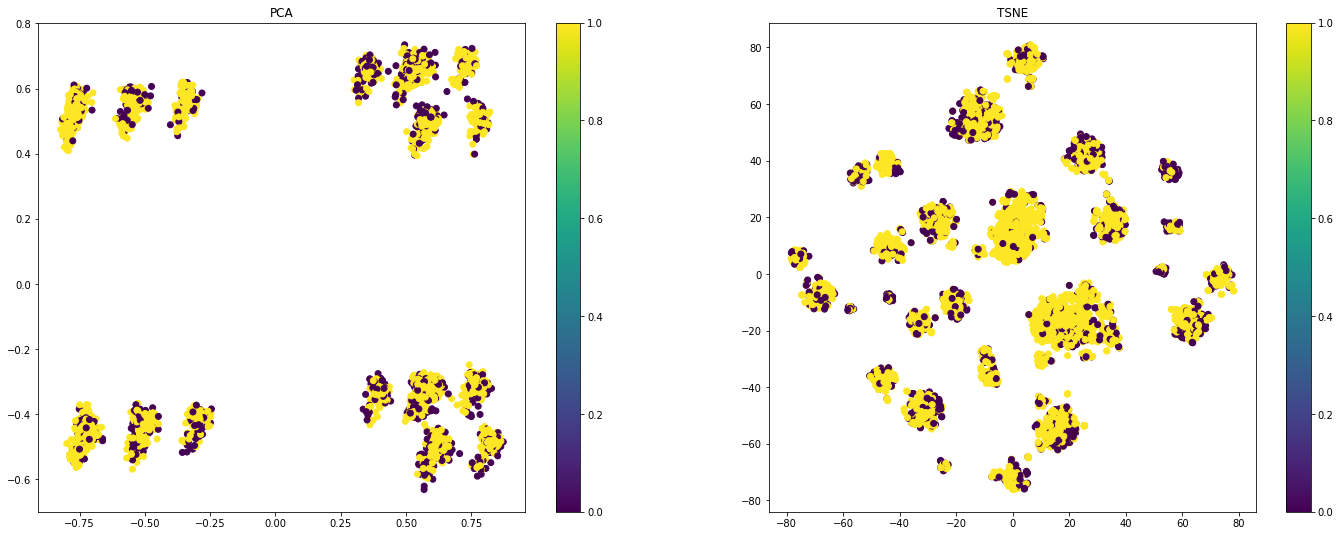

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
red1 = PCA()
z1 = red1.fit_transform(Xtrain)

#TSNE

red2 = TSNE()
z2 = red2.fit_transform(Xtrain)

plt.figure(figsize=(24,9))

plt.subplot(121)
plt.scatter(z1[:,0],z1[:,1],c=ytrain)
plt.colorbar()
plt.title('PCA')

plt.subplot(122)
plt.scatter(z2[:,0],z2[:,1],c=ytrain)
plt.colorbar()
plt.title('TSNE')
plt.show()

# Clasificación

## Primero probamos los métodos clásicos de clasificación

Hacemos una búsquedad por grilla y probamos algunos de los algoritmos implementados en sklearn. Implementamos una etapa de representación con KMeans, para probar los resultados con este algoritmo utilizándolo como un extractor de características.

In [ ]:
%%time
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.externals import joblib #https://joblib.readthedocs.io/en/latest/
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans


steps=[[('rep', KMeans()),
        ('cla', GaussianNB())],
       [('rep', KMeans()),
        ('cla', SGDClassifier())],
       [('rep', KMeans()),
        ('cla', LinearDiscriminantAnalysis())],
       [('rep', KMeans()),
        ('cla', QuadraticDiscriminantAnalysis())],
       [('rep', KMeans()),
        ('cla', KNeighborsClassifier())],
       [('rep', KMeans()),
        ('cla', LogisticRegression())],
       [('rep', KMeans()),
        ('cla', RandomForestClassifier())]
      ]
parameters = [{              
              'cla__var_smoothing': [1e-9, 1e-6, 1e-3, 1],          #GaussianNB
               'rep__n_clusters' : range(2,10)
              },
              {           
              'cla__alpha': [0.0001,0.001,0.01,0.1],    #SGD
              'cla__penalty': ['elasticnet'],  # Probamos solo con elasticnet pues modificando el l1_ratio se pueden probar l1 y l2 (para l1_ratio = 0 y 1)
              'cla__l1_ratio': [0,0.5,1],
               'rep__n_clusters' : range(2,10)
              },
              {
                'rep__n_clusters' : range(2,10)
              },                    #LinearDiscriminant                
             {
                 'rep__n_clusters' : range(2,10)
              },                    #QuadraticDiscriminant   
              {
               'cla__n_neighbors': [1,5,10,20],            #Kneighbors
               'cla__leaf_size': [10,20,30,40],
               'cla__p': [1,2],                  #Distancia de Manhattam o euclídea
               'cla__weights': ['uniform','distance'],
               'rep__n_clusters' : range(2,10)
             },
              {
             'cla__C': [0.1,0.5, 1],             #Logistic
             'rep__n_clusters' : range(2,10)
             },
              {
              'cla__n_estimators': [10,100,500],           #RandomForest
              'cla__max_depth' : [2,3,5],
              'cla__min_samples_split' : [2,5,10],
              'rep__n_clusters' : range(2,10)            
             } 
             ]

label_models = ['GaussianNB','SGDClassifier', 'LDA','QDA','KNeighbors','LogisticRegression','RandomForest']

best_model = []
filename = 'resultados'#'resultados/people_comp'
for i in range(len(steps)): #modelos
    print(label_models[i])
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=10)
    grid_search.fit(Xtrain, ytrain)
    #print(grid_search.cv_results_)
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

GaussianNB
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

SGDClassifier
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1414s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 244 tas

LDA
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1077s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.1s finished


QDA
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1112s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.0s finished


KNeighbors
Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1493s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 244 tas

LogisticRegression
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1195s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.0s finished


RandomForest
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1801s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0369s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 115 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   58.6s
[Parallel(n_jo

Mejores modelos:

CPU times: user 23.6 s, sys: 3.62 s, total: 27.2 s
Wall time: 15min 25s


GaussianNB


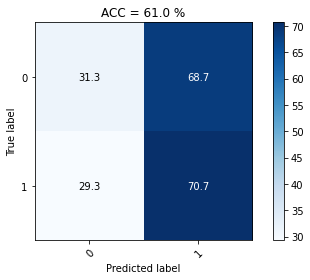

              precision    recall  f1-score   support

           0       0.26      0.31      0.28       284
           1       0.76      0.71      0.73       866

    accuracy                           0.61      1150
   macro avg       0.51      0.51      0.51      1150
weighted avg       0.64      0.61      0.62      1150

SGDClassifier


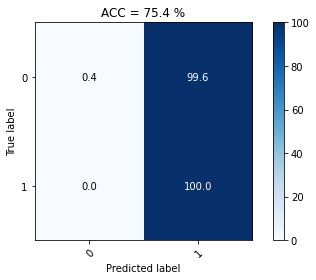

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       284
           1       0.75      1.00      0.86       866

    accuracy                           0.75      1150
   macro avg       0.88      0.50      0.43      1150
weighted avg       0.81      0.75      0.65      1150

LDA


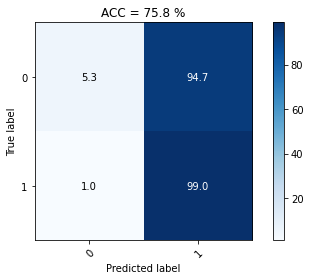

              precision    recall  f1-score   support

           0       0.62      0.05      0.10       284
           1       0.76      0.99      0.86       866

    accuracy                           0.76      1150
   macro avg       0.69      0.52      0.48      1150
weighted avg       0.73      0.76      0.67      1150

QDA


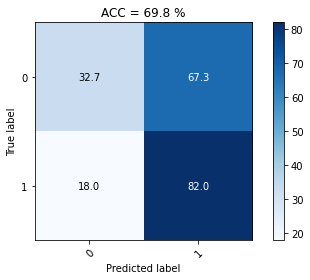

              precision    recall  f1-score   support

           0       0.37      0.33      0.35       284
           1       0.79      0.82      0.80       866

    accuracy                           0.70      1150
   macro avg       0.58      0.57      0.58      1150
weighted avg       0.69      0.70      0.69      1150

KNeighbors


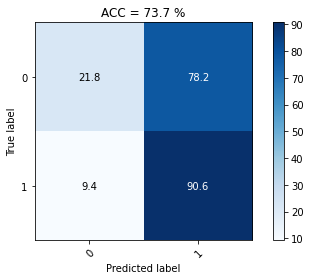

              precision    recall  f1-score   support

           0       0.43      0.22      0.29       284
           1       0.78      0.91      0.84       866

    accuracy                           0.74      1150
   macro avg       0.61      0.56      0.56      1150
weighted avg       0.69      0.74      0.70      1150

LogisticRegression


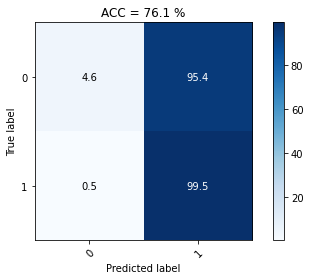

              precision    recall  f1-score   support

           0       0.76      0.05      0.09       284
           1       0.76      1.00      0.86       866

    accuracy                           0.76      1150
   macro avg       0.76      0.52      0.47      1150
weighted avg       0.76      0.76      0.67      1150

RandomForest


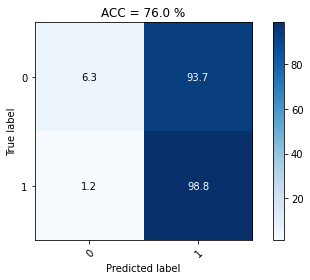

              precision    recall  f1-score   support

           0       0.64      0.06      0.12       284
           1       0.76      0.99      0.86       866

    accuracy                           0.76      1150
   macro avg       0.70      0.53      0.49      1150
weighted avg       0.73      0.76      0.68      1150



In [ ]:
from sklearn.metrics import accuracy_score
from funciones_desercion import plot_confusion_matrix
from sklearn.metrics import classification_report

my_model_loaded = joblib.load(filename+".pkl")
path_img = ''
for i in range(len(my_model_loaded)):
    print(label_models[i])

    ytest_e = my_model_loaded[i].predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
     
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes=[0,1],
                          normalize=True,
                          title='ACC = %.1f %%' % (100*acc)
                          )
    plt.autoscale()                   
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               labels=[0,1],
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)

Según estos resultados, el mejor modelo entrenado fue el de KNeighbors, pues a pesar de que tuvo una exactitud de tan solo 73.7% fue el que tuvo mejor F1-Score ponderado (*weighted avg*). Si bien hubo modelos que alcanzaron mejor exactitud, recordemos que al estar trabajando con datos desbalanceados, la exactitud del modelo no se traduce directamente en buen rendimiento. (Recordemos que un clasificador *tonto* tendría una exactitud del 75%). 

El hecho de que KNeighbors hubiera sido el mejor modelo de todos los entrenados no quiere decir que este sea bueno, pues la proporción de falsos positivos sigue siendo considerablemente alta. 

En general, todos los modelos tuvieron una proprción bastante grande de falsos positivos, esto debido probablemente al desbalance con el que venían los datos, o a la complejidad misma del problema.

## Ahora probamos una arquitectura de aprendizaje profundo

In [ ]:
## Priemro hacemos una partición estratificada, para que tanto el conjunto de entrenamiento como el de validación queden con el mismo desbalance que tienen los datos

from sklearn.model_selection import train_test_split


Xtrain2, Xval, ytrain2, yval = train_test_split(Xtrain, ytrain, stratify=ytrain, test_size = 0.2)

In [ ]:
import tensorflow as tf
import numpy as np

ytrain2 = np.array(ytrain2).reshape(-1,1)
ytest = np.array(ytest).reshape(-1,1)
yval = np.array(yval).reshape(-1,1)

Model: "model_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 27)]              0         
_________________________________________________________________
h1 (Dense)                   (None, 32)                896       
_________________________________________________________________
dropout_88 (Dropout)         (None, 32)                0         
_________________________________________________________________
h2 (Dense)                   (None, 24)                792       
_________________________________________________________________
dropout_89 (Dropout)         (None, 24)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 25        
Total params: 1,713
Trainable params: 1,713
Non-trainable params: 0
________________________________________________________

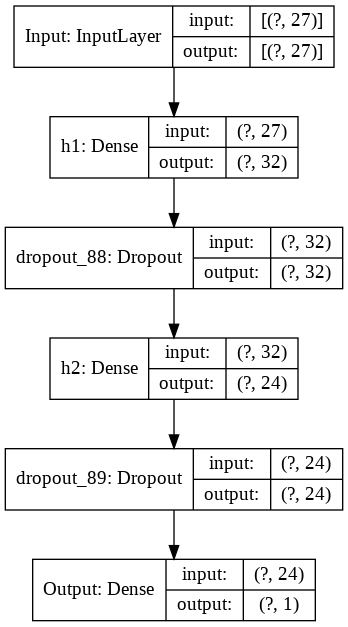

In [ ]:
input_l = tf.keras.layers.Input(shape=Xtrain2.shape[1],name='Input')


l1 = 1e-5
l2 = 1e-5
Q1 = 32
Q2 = 24


h1 = tf.keras.layers.Dense(Q1,activation='relu',name='h1',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(input_l)
drop1 = tf.keras.layers.Dropout(0.1)(h1)
h2 = tf.keras.layers.Dense(Q2,activation='relu',name='h2',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(drop1)
drop2 = tf.keras.layers.Dropout(0.1)(h2)

output_l = tf.keras.layers.Dense(1,activation='sigmoid',name='Output')(drop2)

model = tf.keras.Model(inputs=[input_l],outputs=[output_l])
model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy","Precision"]) 

history = model.fit(x = Xtrain2, y = ytrain2, 
                        epochs=50, batch_size = 32, # 32, 64, 128, 256
                         validation_data = (Xval,yval))

Epoch 1/50
115/115 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.7117 - precision: 0.7498 - val_loss: 0.5595 - val_accuracy: 0.7522 - val_precision: 0.7522
Epoch 2/50
115/115 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7527 - precision: 0.7524 - val_loss: 0.5413 - val_accuracy: 0.7533 - val_precision: 0.7530
Epoch 3/50
115/115 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7516 - precision: 0.7547 - val_loss: 0.5293 - val_accuracy: 0.7554 - val_precision: 0.7552
Epoch 4/50
115/115 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7636 - precision: 0.7644 - val_loss: 0.5321 - val_accuracy: 0.7728 - val_precision: 0.7818
Epoch 5/50
115/115 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7663 - precision: 0.7707 - val_loss: 0.5202 - val_accuracy: 0.7750 - val_precision: 0.7823
Epoch 6/50
115/115 [==============================] - 0s 2ms/step - lo

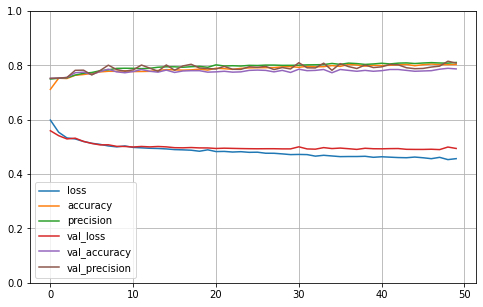

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(Xtest,ytest)

36/36 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7739 - precision: 0.7959


[0.5063177943229675, 0.7739130258560181, 0.7958984375]

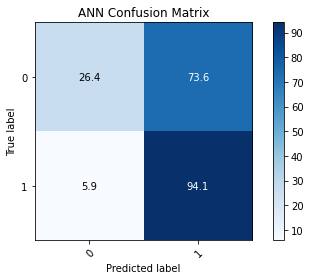

              precision    recall  f1-score   support

           0       0.60      0.26      0.37       284
           1       0.80      0.94      0.86       866

    accuracy                           0.77      1150
   macro avg       0.70      0.60      0.61      1150
weighted avg       0.75      0.77      0.74      1150



In [ ]:
from funciones_desercion import plot_confusion_matrix
from sklearn.metrics import classification_report

y_est = model.predict(Xtest)

plot_confusion_matrix(ytest,y_est.round(),classes=[0,1],title='ANN Confusion Matrix')
plt.show()

print(classification_report(ytest,y_est.round()))

Podemos concluir que se obtuvo un modelo ligeramente superior a los entrenados utilizando los algortimos clásicos de clasificación, pues en este caso se tuvo un F1-Score ponderado de 0.74, frente a 0.7 de KNeighbors. Además de esto se logró una exactitud del 77.4%, frente a 73.7% de KNeighbors.

## Interpretación salidas intermedias de la red: (visualización utilizando PCA)

In [ ]:
### Capa h1
model_h1 = tf.keras.Model(inputs=[input_l],outputs=model.get_layer('h1').output)
h1Out = model_h1.predict(Xtrain2)
#tf.keras.utils.plot_model(model_h1A)
red1 = PCA()
zh1Out = red1.fit_transform(h1Out)

### Capa h2
model_h2 = tf.keras.Model(inputs=[input_l],outputs=model.get_layer('h2').output)
h2Out = model_h2.predict(Xtrain2)
#tf.keras.utils.plot_model(model_h1A)
red2 = PCA()
zh2Out = red2.fit_transform(h2Out)


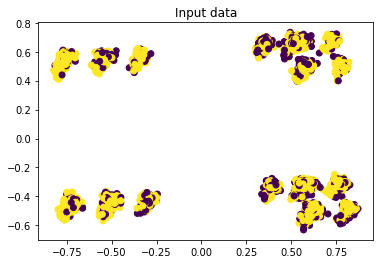

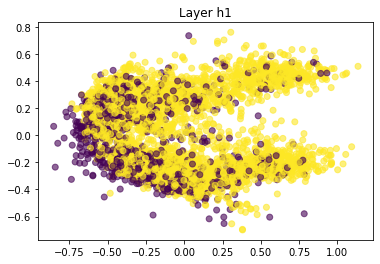

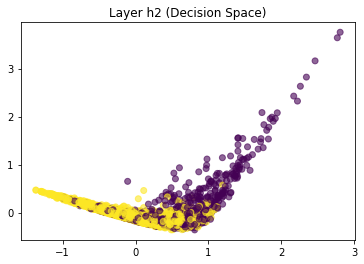

In [ ]:
plt.scatter(z1[:,0],z1[:,1],c=ytrain)
plt.title("Input data")
plt.show()

plt.scatter(zh1Out[:,0],zh1Out[:,1],c = ytrain2,alpha=0.6)
plt.title("Layer h1")
plt.show()

plt.scatter(zh2Out[:,0],zh2Out[:,1],c = ytrain2,alpha=0.6)
plt.title("Layer h2 (Decision Space)")
plt.show()



Puede verse como en cada capa se van separando de manera diferente las dos clases. En la capa h2, la cual corresponde al espacio de clasificación, podemos ver como una parte de las muestras queda perfectamente separada, mientras que en la región del centro sigue habiendo mucho traslape entre las muestras de las dos clases.